In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wandb

In [2]:
WANDB_PROJECT = None

## Load data

In [3]:
from pathlib import Path
import os

data_dir = Path('./data/')
data_path = Path('./data/fashion_mnist.npz')

if data_path.is_file():
    print('Data found. Loading...')
    data = np.load(data_path)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
else:
    print('Data not found. Downloading...')
    if not data_dir.is_dir():
        os.mkdir(data_dir)
    from keras.datasets import fashion_mnist
    (X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
    X_train, X_test = X_train/255., X_test/255.
    np.savez_compressed(data_path, X_train, Y_train, X_test, Y_test)

Data found. Loading...


In [4]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
CLASS_LABELS = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

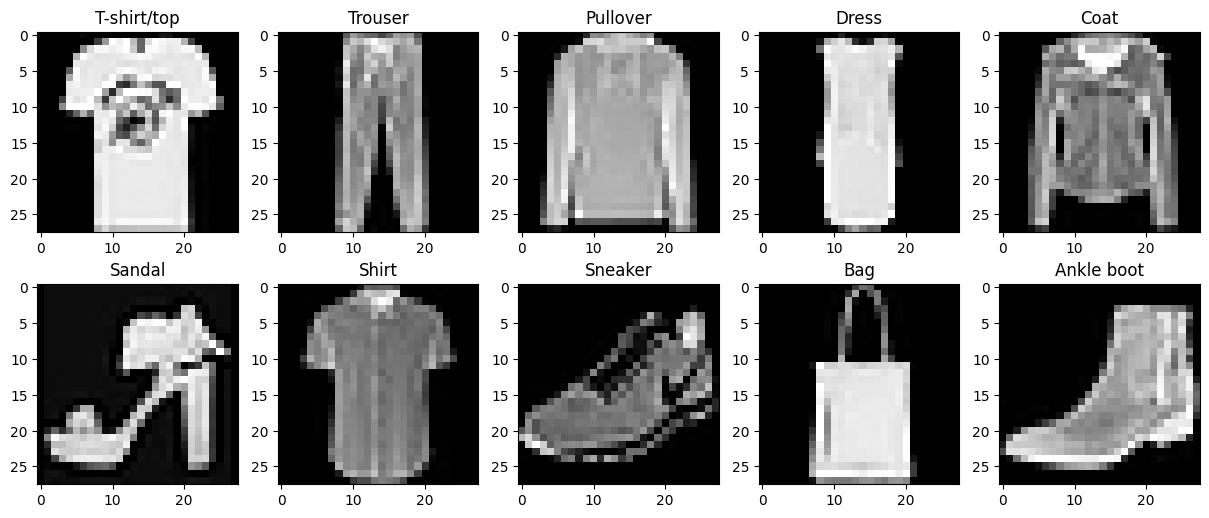

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    row_no = i//5
    col_no = i%5
    X_sub = X_train[Y_train==i]
    index = np.random.choice(a=range(len(X_sub)), size=1)
    ax[row_no][col_no].imshow(X_sub[index].reshape((28, 28)), cmap='gray')
    ax[row_no][col_no].set_title(CLASS_LABELS[i])
    if WANDB_PROJECT is not None:
        with wandb.init(project=WANDB_PROJECT):
            wandb.log({'examples': wandb.Image(X_sub[index].reshape(28, 28, 1), caption=CLASS_LABELS[i])})

## Trying model on data

In [7]:
from activations import *
from losses import *
from metrics import *
from nn import *
from optimizers import *
from learn import *

In [15]:
model = FeedForwardNeuralNetwork(0, 128, activation='sigmoid', weight_init='xavier')
optimizer = StochasticGradientDescent(model, lr=1e-2)
loss_fn = CrossEntropyLoss()
metric = categorical_accuracy

In [16]:
history = fit(
    model,
    X_train[:54000].reshape(-1, 784),
    Y_train[:54000],
    X_train[54000:].reshape(-1, 784),
    Y_train[54000:],
    optimizer,
    loss_fn,
    metric,
    batch_size=128
)

[Epoch 1/10] train loss: 1.896956, val loss:  1.551421 || train score: 0.533755, val score: 0.674333
[Epoch 2/10] train loss: 1.354773, val loss:  1.188193 || train score: 0.689536, val score: 0.706333
[Epoch 3/10] train loss: 1.097449, val loss:  1.003941 || train score: 0.712678, val score: 0.721833
[Epoch 4/10] train loss: 0.958583, val loss:  0.896700 || train score: 0.726372, val score: 0.735500
[Epoch 5/10] train loss: 0.872947, val loss:  0.827089 || train score: 0.735795, val score: 0.743167
[Epoch 6/10] train loss: 0.814726, val loss:  0.778137 || train score: 0.743497, val score: 0.749000
[Epoch 7/10] train loss: 0.772228, val loss:  0.741556 || train score: 0.749090, val score: 0.754167
[Epoch 8/10] train loss: 0.739481, val loss:  0.712890 || train score: 0.755147, val score: 0.758500
[Epoch 9/10] train loss: 0.713158, val loss:  0.689562 || train score: 0.760608, val score: 0.762333
[Epoch 10/10] train loss: 0.691278, val loss:  0.669999 || train score: 0.765625, val score

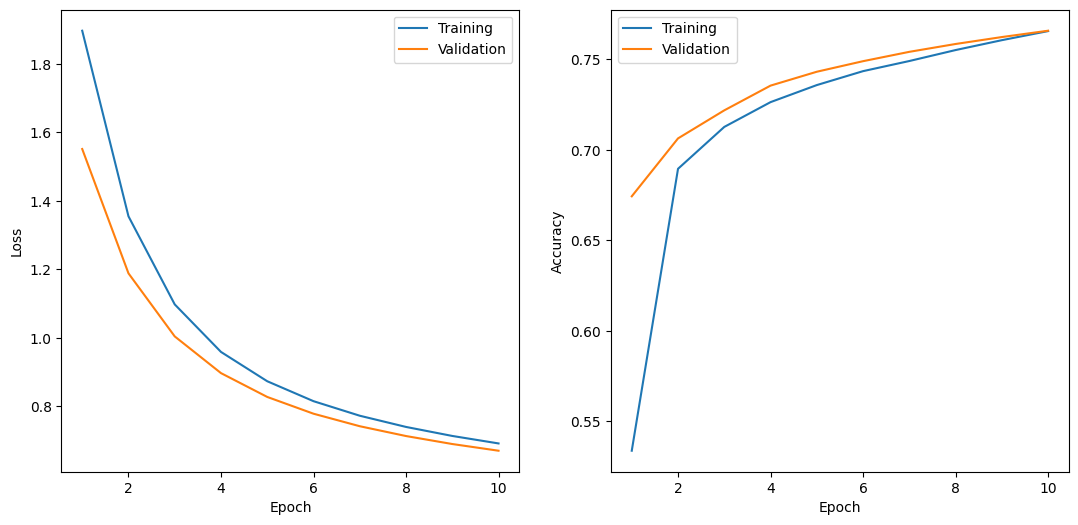

In [17]:
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.plot(history['epoch'], history['train_loss'], label='Training')
plt.plot(history['epoch'], history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history['epoch'], history['train_score'], label='Training')
plt.plot(history['epoch'], history['val_score'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()